## Проект "Нефть"

**Описание исследования:**

Нашему отделу необходимо определить наиболее привлекательные места для бурения нефтяных скважин. Заказчик предоставил пробы нефти в трёх регионах и информацию, что стоимость разраотки одной скважины (10 млрд рублей). Актуальные цены на сегодняшний день - это 45 000 рублей за баррель. Заказчик подчеркнул, что ему необходимо определить регионы нефтедобычи с наименьшим риском убытков (<2.5%). Нужно также из 500 точек региона выбрать 200 самых лучших. 

**Цель исследования:**

Выбрать регион для нефтедобычи

**Задачи исследования:**
- Исследовать все данные нам признаки
- Подготовить данные для построения моделей
- Построить модель, предсказывающую потенциальные объёмы запасов в скважине
- Создать функцию для оценки прибыли со скважины
- Выделить регион с наименьшими рисками убытков и 200 лучших скважин в нём

________________________________________________

**Данное исследование разделим на несколько частей.**

***Часть 1. Загрузка данных:***
* [Загрузка библиотек](#Введение)
* [Изучение общей информации о данных](#Первичный_анализ)

***Часть 2. Подготовка данных:***
* [Удаление дубликатов, пропусков, поиск аномалий](#Предобработа_данных)
* [Визуализация данных, поиск взаимосвязей между данными](#Исследовательский_анализ_данных)

***Часть 3. Обучение модели предсказания уровня удовлетворённости сотрудников:***
* [Создание пайнплайна для выявление наилучшей модели машинного обучения](#Модель_1)
* [Предсказание модели на тетсовых данных](#Предсказание_модели_1)

***Часть 4. Загрузка, предобработка и анализ данных для второй модели:***
* [Загрузка новых данных](#Загрузка_новых_данных)
* [Предобработка данных](#предобработка_данных_2)
* [Анализ новых признаков, составление портрета уволившегося сотрудника, взаимосвязь увольнения и удовлетворённости](#исследовательский_анализ_2)

***Часть 5. Обучение модели предсказания увольнения сотрудника:***
* [Подготовка данных и обучение второй модели](#Модель_2)
* [Предсказание модели на тестовых данных](#предсказание_модели_2)

***Выводы:***
* [Итоговые выводы](#Выводы) 

**Библиотеки и переменные**

In [2]:
import pandas as pd
import numpy as np
from numpy.random import RandomState
import matplotlib.pyplot as plt
import scipy as sc
import seaborn as sns
import phik
from sklearn.preprocessing import  StandardScaler, RobustScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import make_scorer, mean_squared_error
    
RANDOM_STATE = 42
TEST_SIZE = 0.25
сoast_oil = 450000
money = 10000000000
oil_count = 200
count_of_discover_oil = 500

# Загрузка данных

In [3]:
try:
    region_one = pd.read_csv('/datasets/geo_data_0.csv')
except:
    region_one = pd.read_csv('C:/Users/simuk/Desktop/IT/проект/geo_data_0.csv')

In [4]:
try:
    region_two = pd.read_csv('/datasets/geo_data_1.csv')
except:
    region_two = pd.read_csv('C:/Users/simuk/Desktop/IT/проект/geo_data_1.csv')

In [5]:
try:
    region_three = pd.read_csv('/datasets/geo_data_2.csv')
except:
    region_three = pd.read_csv('C:/Users/simuk/Desktop/IT/проект/geo_data_2.csv')

# Предварительный_анализ

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


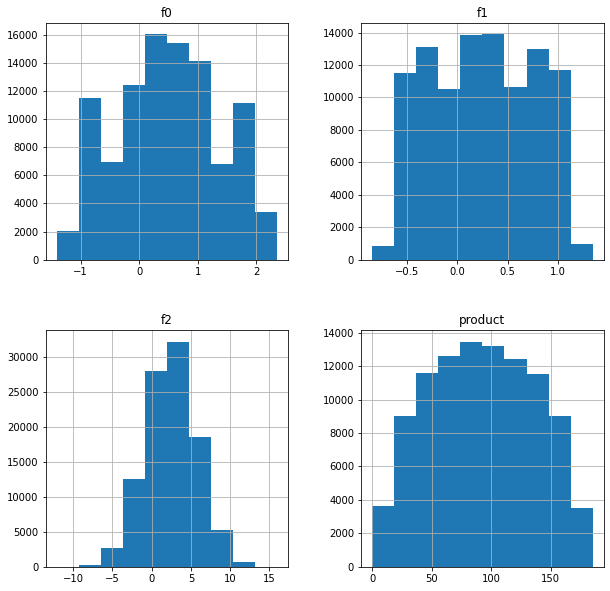

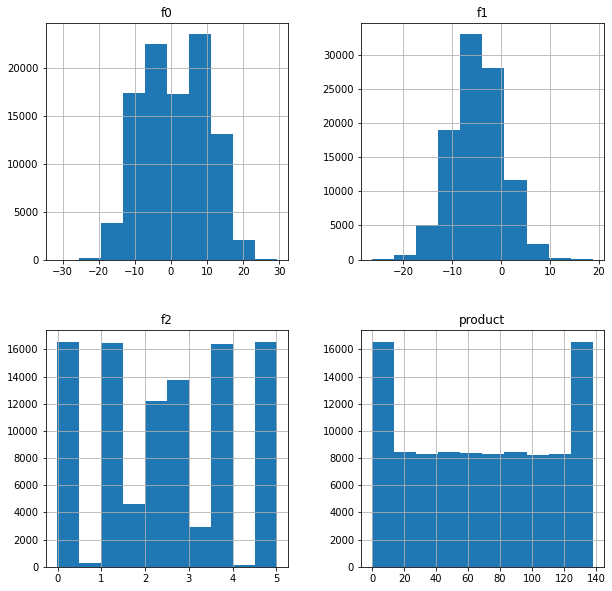

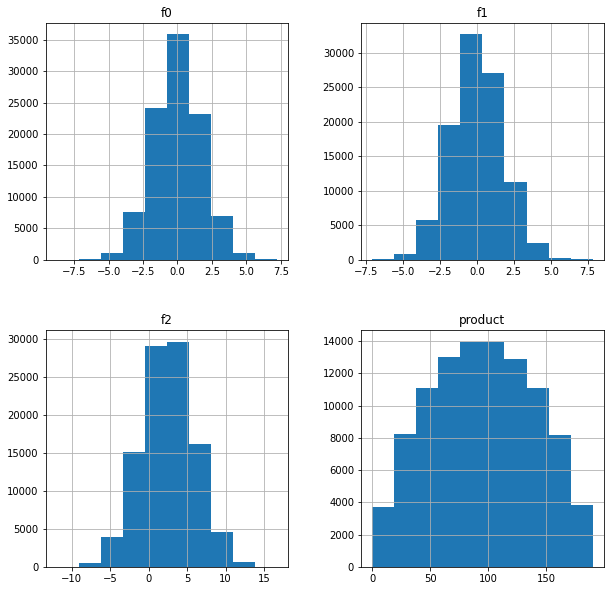

In [6]:
for i in [region_one, region_two, region_three]:
    display(i.head())
    i.info()
    i.hist(bins=10, figsize=(10, 10));

**Выводы:** 

- Исходя из предварительного анализа данных проверка на пропуски смысла не имеет, потому что всех столбцах одинаковое количество заполненных значений. 
- Все данные соотвествуют заявленным типам. 
- Нет смысла проводить проверку на неочевидные дубликаты, потому что все значения в датасетах имеют тип данных float
- Вероятнее всего аномалий также не будет

# Предобработка_данных

In [7]:
list_dublicate = region_three.drop('id', axis=1).columns
list_dublicate

Index(['f0', 'f1', 'f2', 'product'], dtype='object')

Название столбцов везде одинаковое, поэтому не нужно создавать названия для каждого датафрейма

**Функции**

In [8]:
def remove_duplicates(name, list_duplicate):
    print(name.duplicated(subset=list_duplicate).sum())
    name = name.drop_duplicates(subset=list_duplicate)
    return name

In [9]:
def anomaly(df):
    object_columns = df.select_dtypes(exclude='object').columns
    for column in object_columns:
        
        plt.figure(figsize=(8, 6))
        plt.boxplot(df[column])
        plt.title(f'Boxplot for {column}')
        plt.show()
        print(df[column].describe())

**Предобработка**

In [10]:
for i in [region_one, region_two, region_three]:
    remove_duplicates(i, list_dublicate)

0
0
0


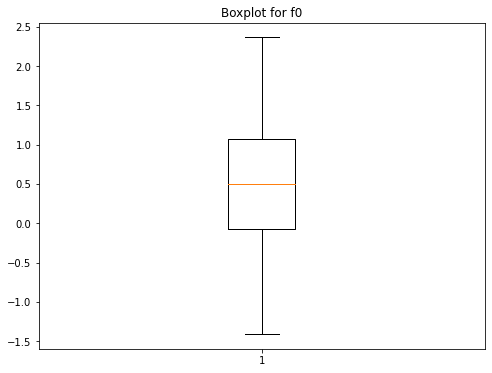

count    100000.000000
mean          0.500419
std           0.871832
min          -1.408605
25%          -0.072580
50%           0.502360
75%           1.073581
max           2.362331
Name: f0, dtype: float64


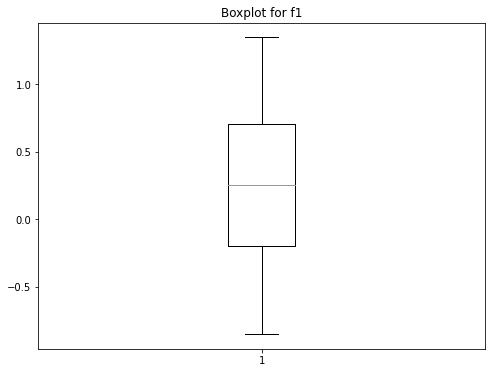

count    100000.000000
mean          0.250143
std           0.504433
min          -0.848218
25%          -0.200881
50%           0.250252
75%           0.700646
max           1.343769
Name: f1, dtype: float64


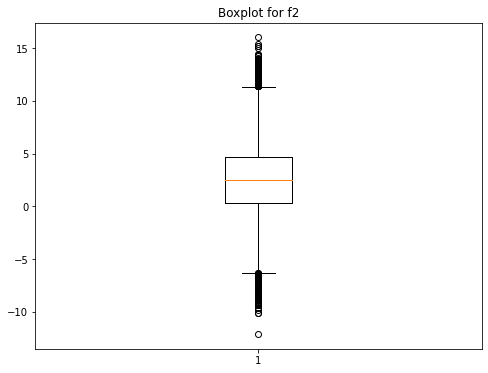

count    100000.000000
mean          2.502647
std           3.248248
min         -12.088328
25%           0.287748
50%           2.515969
75%           4.715088
max          16.003790
Name: f2, dtype: float64


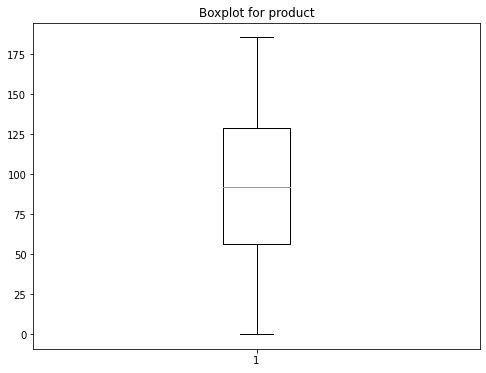

count    100000.000000
mean         92.500000
std          44.288691
min           0.000000
25%          56.497507
50%          91.849972
75%         128.564089
max         185.364347
Name: product, dtype: float64


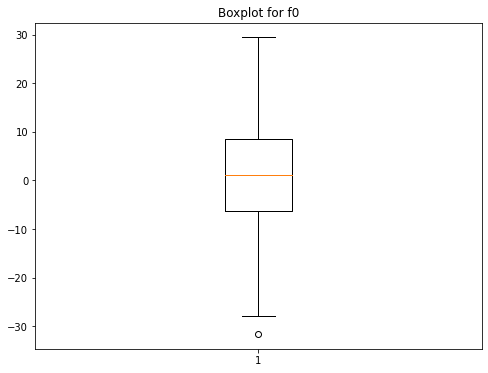

count    100000.000000
mean          1.141296
std           8.965932
min         -31.609576
25%          -6.298551
50%           1.153055
75%           8.621015
max          29.421755
Name: f0, dtype: float64


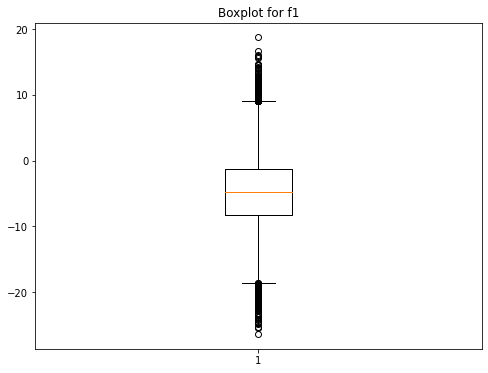

count    100000.000000
mean         -4.796579
std           5.119872
min         -26.358598
25%          -8.267985
50%          -4.813172
75%          -1.332816
max          18.734063
Name: f1, dtype: float64


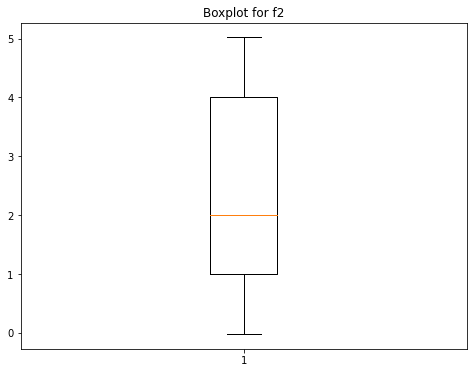

count    100000.000000
mean          2.494541
std           1.703572
min          -0.018144
25%           1.000021
50%           2.011479
75%           3.999904
max           5.019721
Name: f2, dtype: float64


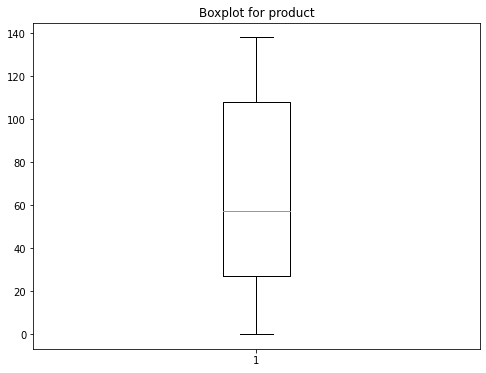

count    100000.000000
mean         68.825000
std          45.944423
min           0.000000
25%          26.953261
50%          57.085625
75%         107.813044
max         137.945408
Name: product, dtype: float64


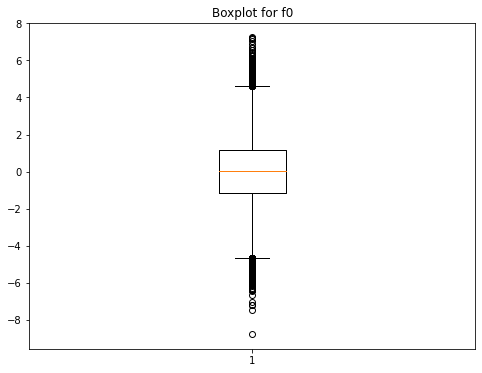

count    100000.000000
mean          0.002023
std           1.732045
min          -8.760004
25%          -1.162288
50%           0.009424
75%           1.158535
max           7.238262
Name: f0, dtype: float64


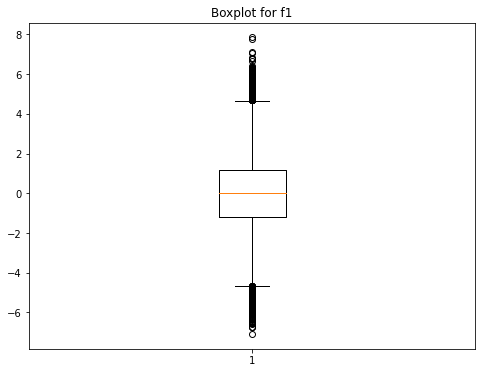

count    100000.000000
mean         -0.002081
std           1.730417
min          -7.084020
25%          -1.174820
50%          -0.009482
75%           1.163678
max           7.844801
Name: f1, dtype: float64


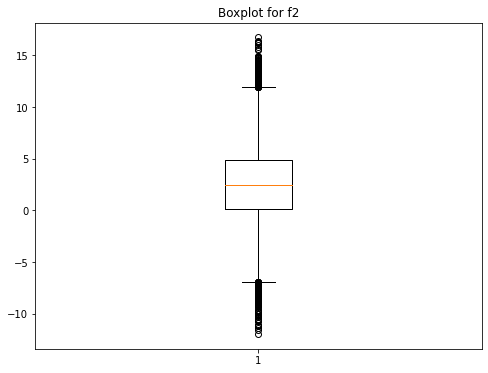

count    100000.000000
mean          2.495128
std           3.473445
min         -11.970335
25%           0.130359
50%           2.484236
75%           4.858794
max          16.739402
Name: f2, dtype: float64


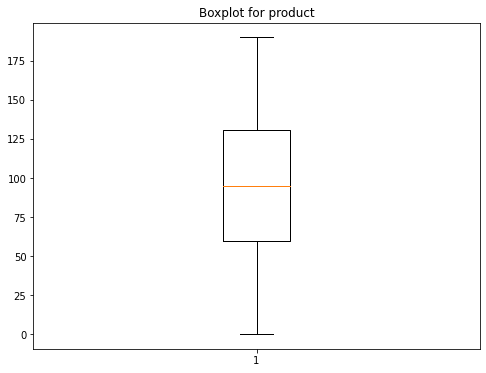

count    100000.000000
mean         95.000000
std          44.749921
min           0.000000
25%          59.450441
50%          94.925613
75%         130.595027
max         190.029838
Name: product, dtype: float64


In [11]:
for i in [region_one, region_two, region_three]:
    anomaly(i)

**Выводы:**

- Дубликаты не обнаружены
- Аномалии также не обнаружены

# Исследовательский_анализ

**Функции**

In [12]:
def info_about_df(df):
    display(df.head(10))
    df.info()
    discret_columns = ['supervisor_evaluation', 'employment_years']

    numeric_columns = df.select_dtypes(include=['number']).columns
    categorical_columns = df.select_dtypes(include=['object']).columns
    #try:
        #numeric_columns = numeric_columns = list(set(numeric_columns) - set(discret_columns))
    #except:
       # pass

    for column in numeric_columns:
        plt.figure(figsize=(12, 15))
        plt.hist(df[column], bins=20, color='lightcoral', edgecolor='black')
        plt.title(f'Гистограмма для колонки {column}')
        plt.xlabel(column)
        plt.ylabel('Частота')
        plt.show()
    try:
            for column in discret_columns:
                plt.figure(figsize=(10, 14))
                sns.countplot(data=df, x=column, color='deepskyblue')
                plt.title(f'Барплот для колонки {column}')
                plt.xlabel(column)
                plt.ylabel('Частота')
                plt.show()
    except:
        pass
    
    for column in categorical_columns:
        plt.figure(figsize=(15, 14))
        sns.countplot(data=df, x=column, color='skyblue')
        plt.title(f'Барплот для колонки {column}')
        plt.xlabel(column)
        plt.ylabel('Частота')
        plt.xticks(rotation=45, ha='right')
        plt.show()

,f0,f1,f2,product
0,0.705745,-0.497823,1.221170,105.280062
1,1.334711,-0.340164,4.365080,73.037750
2,1.022732,0.151990,1.419926,85.265647
3,-0.032172,0.139033,2.978566,168.620776
4,1.988431,0.155413,4.751769,154.036647
5,0.969570,0.489775,-0.735383,64.741541
6,0.645075,0.530656,1.780266,49.055285
7,-0.400648,0.808337,-5.624670,72.943292
8,0.643105,-0.551583,2.372141,113.356160
9,2.173381,0.563698,9.441852,127.910945


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   f0       100000 non-null  float64
 1   f1       100000 non-null  float64
 2   f2       100000 non-null  float64
 3   product  100000 non-null  float64
dtypes: float64(4)
memory usage: 3.1 MB


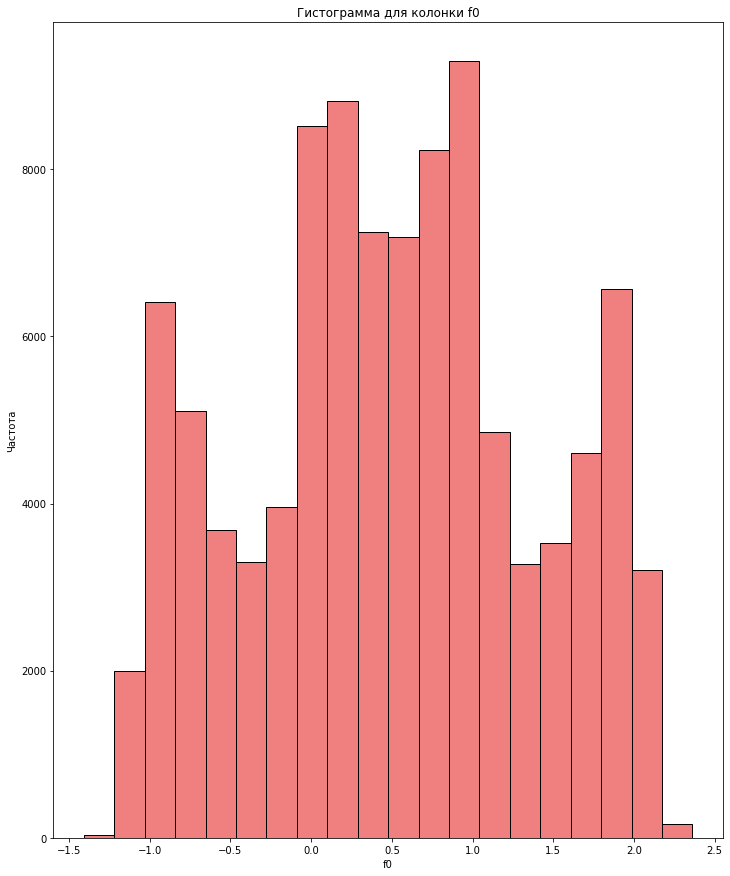

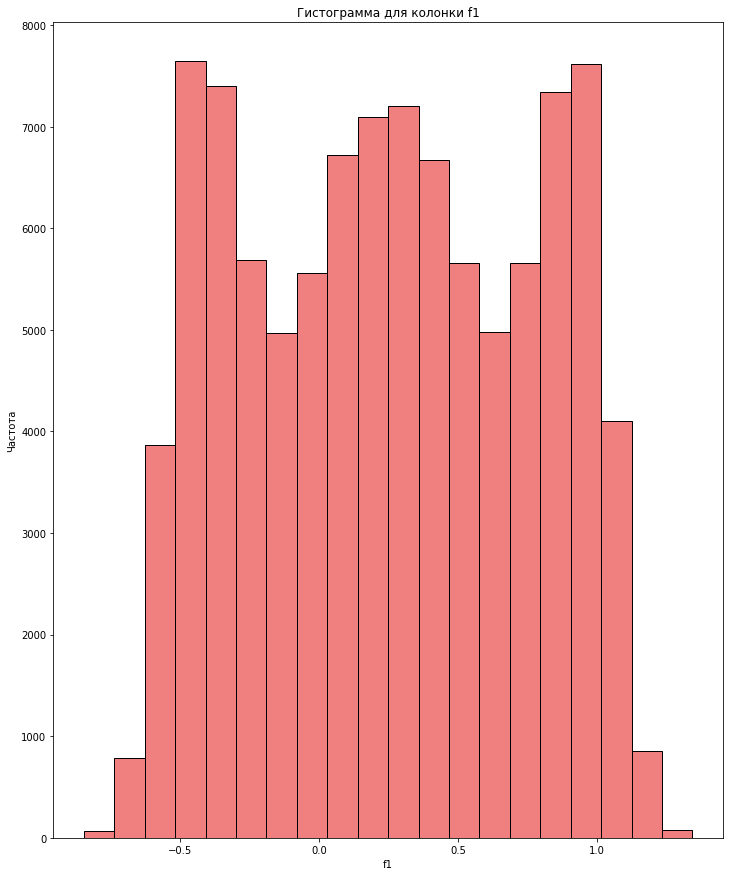

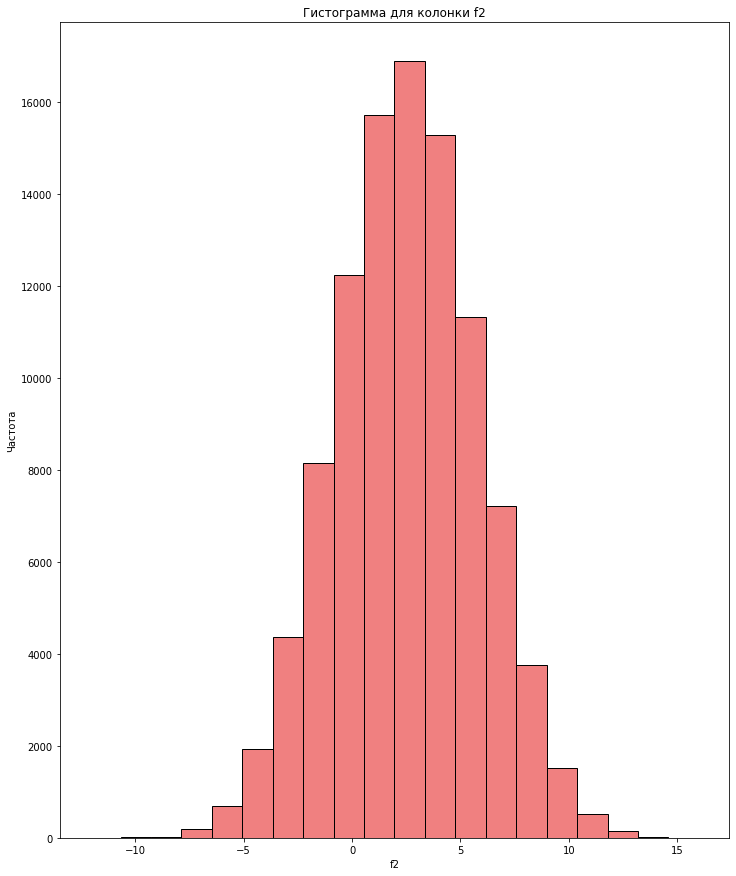

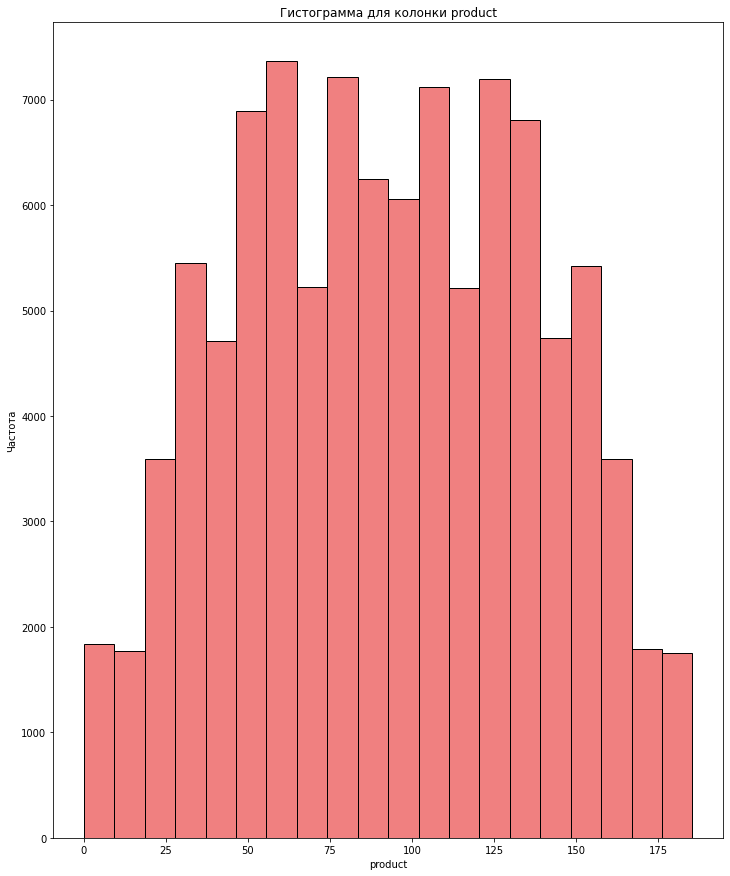

<Figure size 720x1008 with 0 Axes>

In [13]:
info_about_df(region_one.drop('id', axis=1))

,f0,f1,f2,product
0,-15.001348,-8.276000,-0.005876,3.179103
1,14.272088,-3.475083,0.999183,26.953261
2,6.263187,-5.948386,5.001160,134.766305
3,-13.081196,-11.506057,4.999415,137.945408
4,12.702195,-8.147433,5.004363,134.766305
5,-3.327590,-2.205276,3.003647,84.038886
6,-11.142655,-10.133399,4.002382,110.992147
7,4.234715,-0.001354,2.004588,53.906522
8,13.355129,-0.332068,4.998647,134.766305
9,1.069227,-11.025667,4.997844,137.945408


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   f0       100000 non-null  float64
 1   f1       100000 non-null  float64
 2   f2       100000 non-null  float64
 3   product  100000 non-null  float64
dtypes: float64(4)
memory usage: 3.1 MB


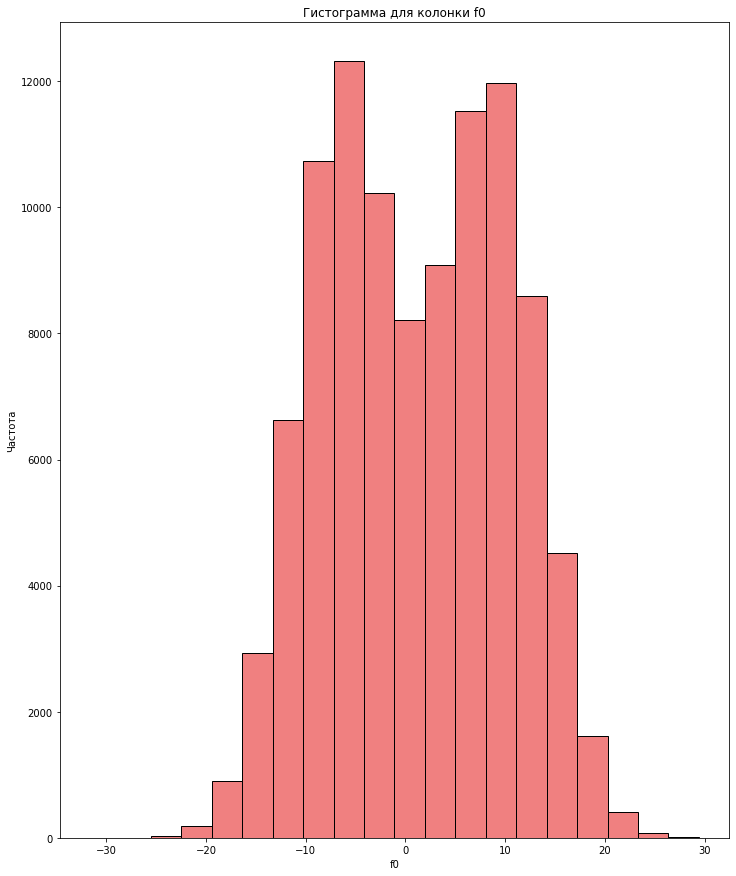

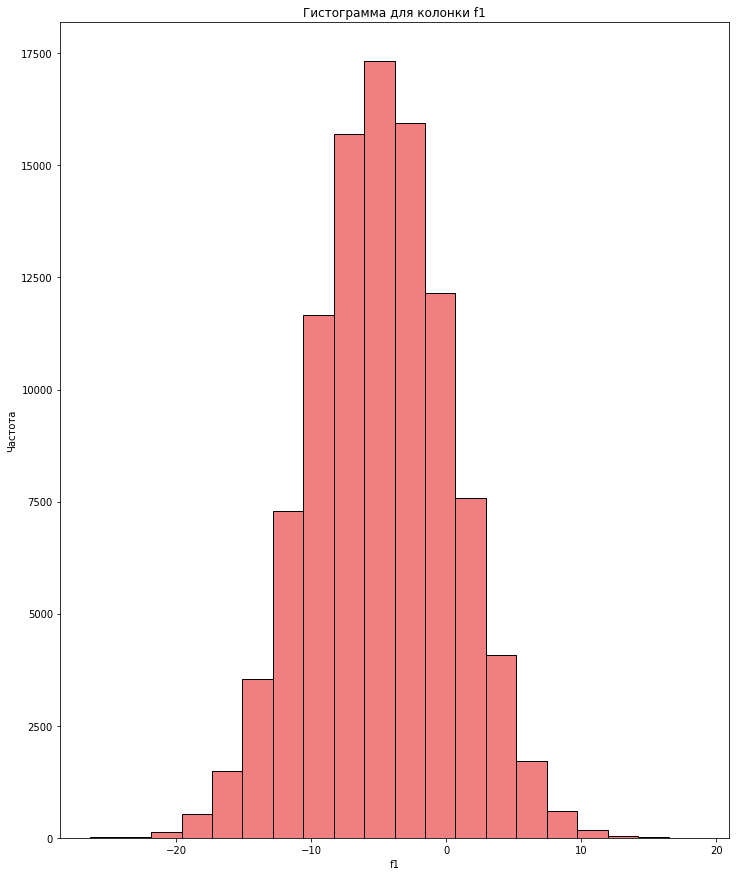

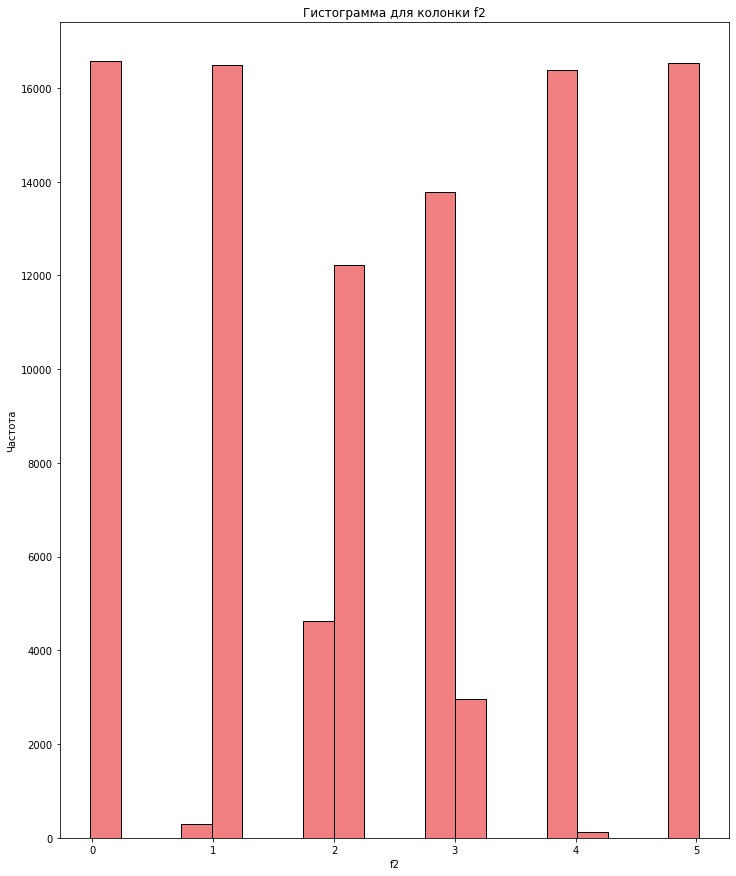

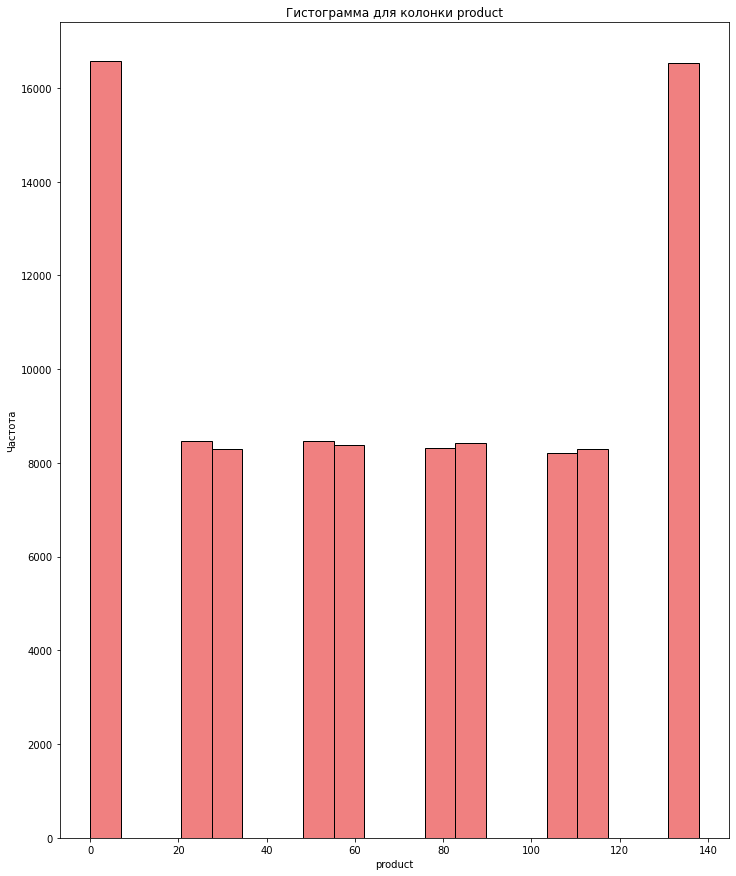

<Figure size 720x1008 with 0 Axes>

In [14]:
info_about_df(region_two.drop('id', axis=1))

,f0,f1,f2,product
0,-1.146987,0.963328,-0.828965,27.758673
1,0.262778,0.269839,-2.530187,56.069697
2,0.194587,0.289035,-5.586433,62.871910
3,2.236060,-0.553760,0.930038,114.572842
4,-0.515993,1.716266,5.899011,149.600746
5,-0.758092,0.710691,2.585887,90.222465
6,-0.574891,0.317727,1.773745,45.641478
7,-1.906649,-2.458350,-0.177097,72.480640
8,1.776292,-0.279356,3.004156,106.616832
9,-1.214452,-0.439314,5.922514,52.954532


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   f0       100000 non-null  float64
 1   f1       100000 non-null  float64
 2   f2       100000 non-null  float64
 3   product  100000 non-null  float64
dtypes: float64(4)
memory usage: 3.1 MB


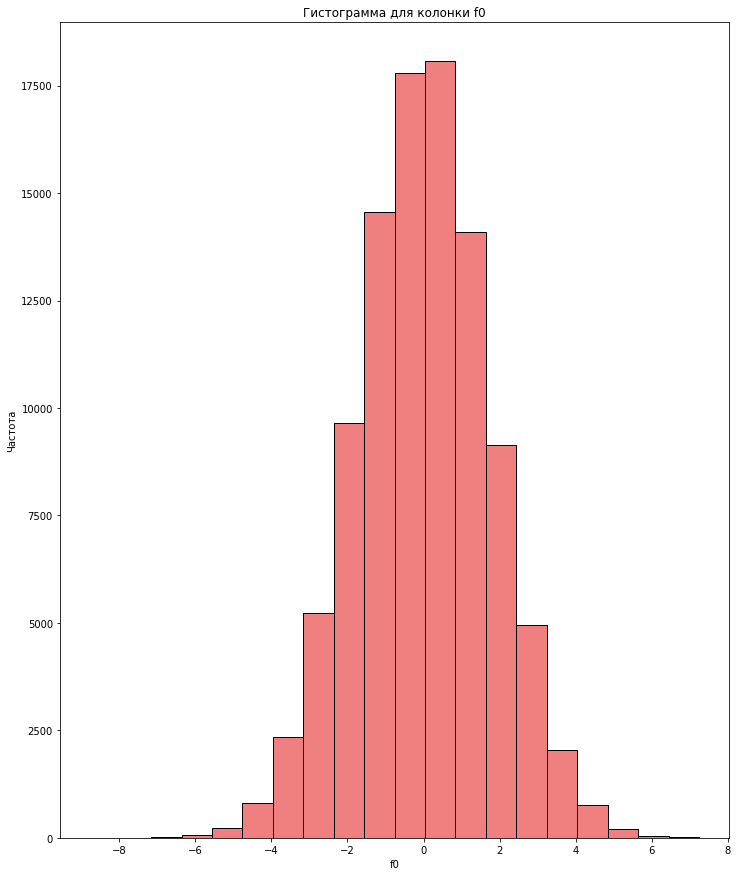

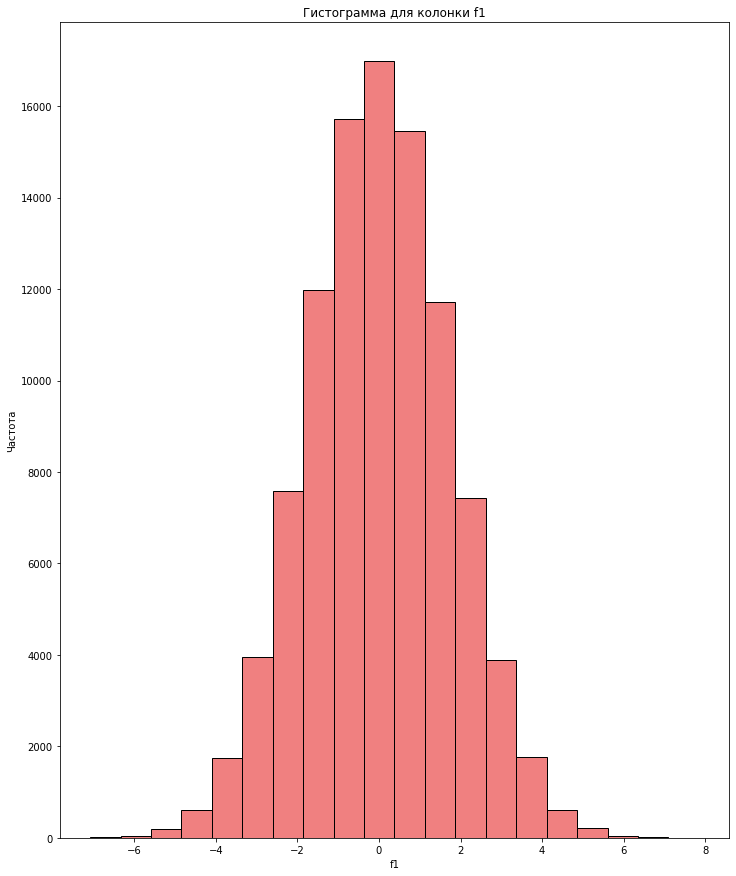

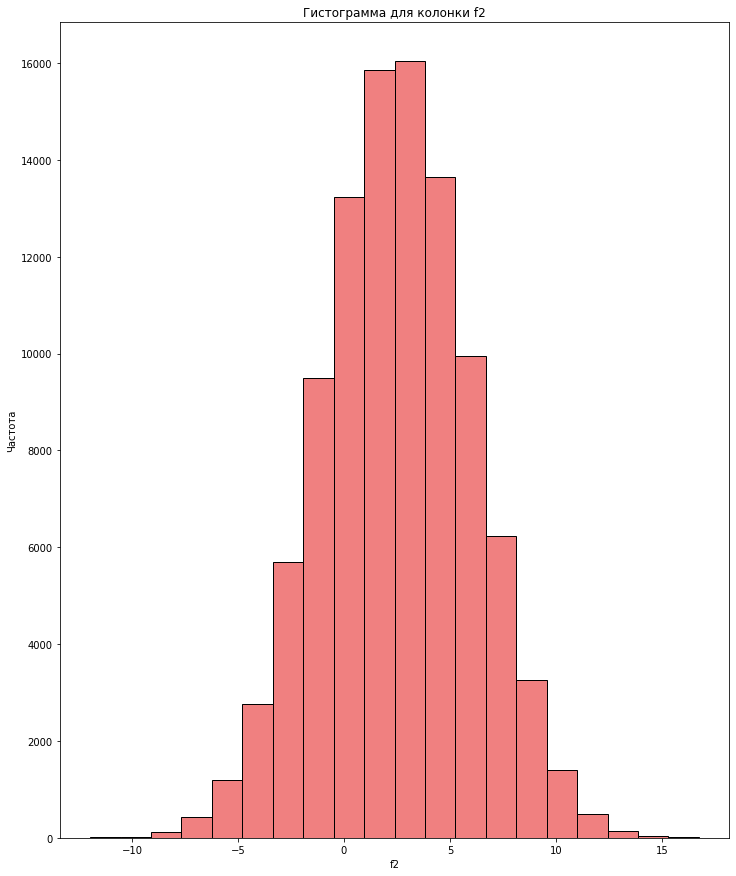

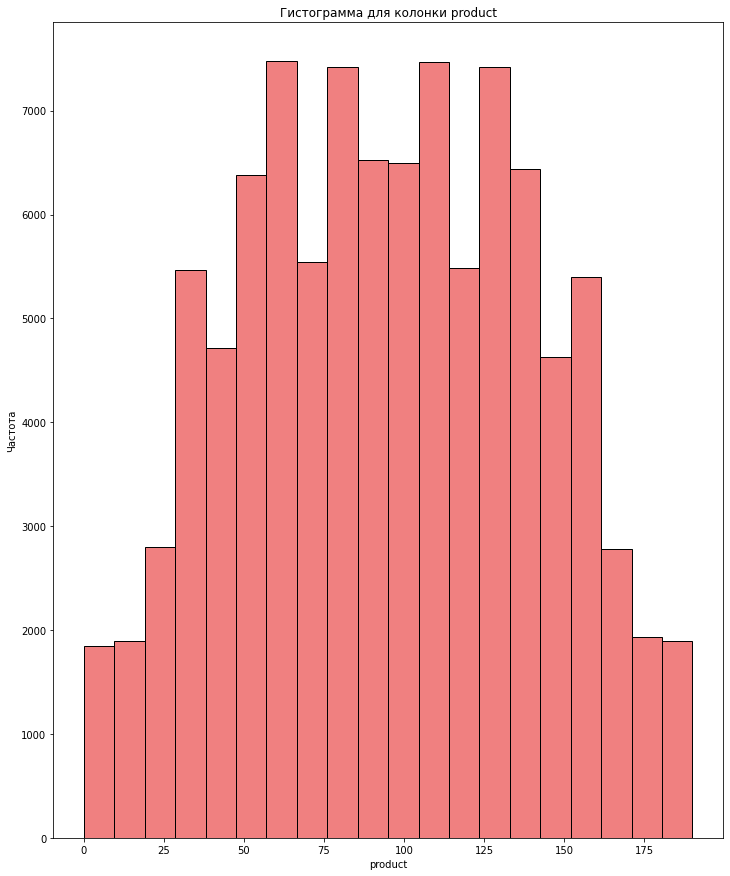

<Figure size 720x1008 with 0 Axes>

In [15]:
info_about_df(region_three.drop('id', axis=1))

interval columns not set, guessing: ['f0', 'f1', 'f2', 'product']


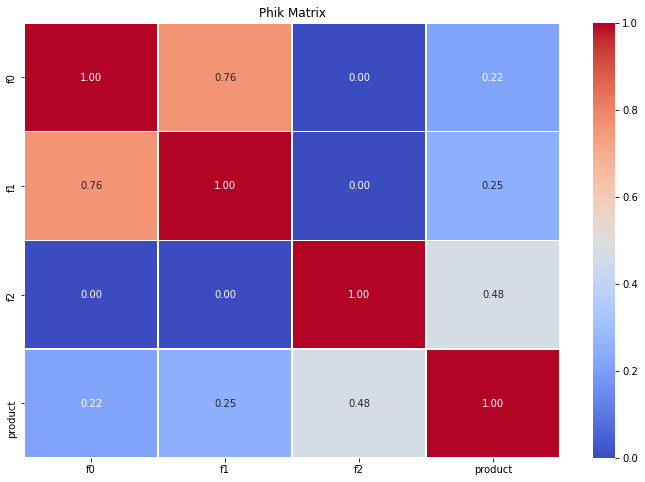

In [16]:
phik_matrix = region_one.drop('id', axis=1).phik_matrix()

plt.figure(figsize=(12, 8))
sns.heatmap(phik_matrix, cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5)
plt.title('Phik Matrix')
plt.show()

interval columns not set, guessing: ['f0', 'f1', 'f2', 'product']


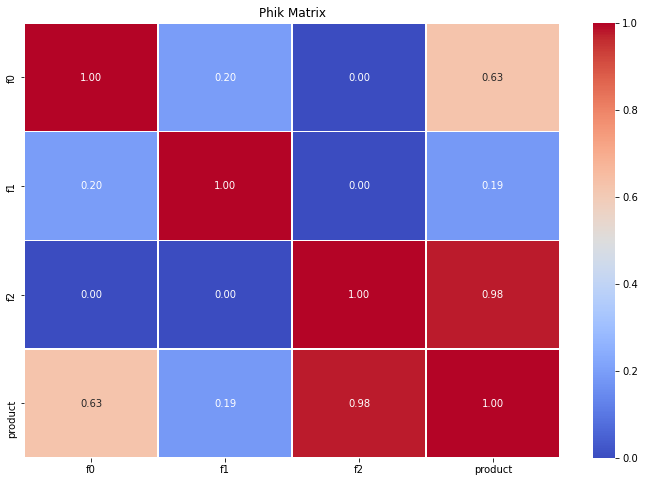

In [17]:
phik_matrix = region_two.drop('id', axis=1).phik_matrix()

plt.figure(figsize=(12, 8))
sns.heatmap(phik_matrix, cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5)
plt.title('Phik Matrix')
plt.show()

interval columns not set, guessing: ['f0', 'f1', 'f2', 'product']


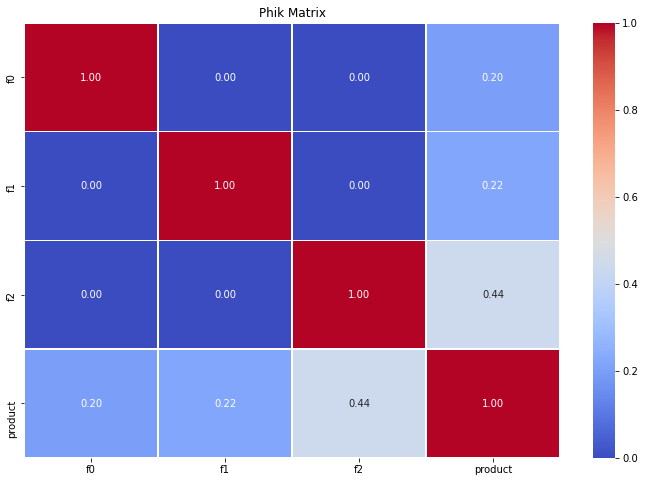

In [18]:
phik_matrix = region_three.drop('id', axis=1).phik_matrix()

plt.figure(figsize=(12, 8))
sns.heatmap(phik_matrix, cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5)
plt.title('Phik Matrix')
plt.show()

Выводы: 
- На продуктивность скважины наибольшее влияние оказывает проба f2, затем f0. 
- Для каждого региона будет построена своя модель

# Машинное_обучение

**Модель для первого региона**

In [19]:
region_one.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [20]:
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))
scoring=make_scorer(rmse, greater_is_better=False)

In [21]:
def tts(df):
    X = df.drop(['id', 'product'], axis=1)
    y = df['product']
    X_train, X_valid, y_train, y_valid = train_test_split(
        X,
        y,
        test_size = TEST_SIZE, 
        random_state = RANDOM_STATE)
    return X, y, X_train, X_valid, y_train, y_valid

In [22]:
X, y, X_train, X_valid, y_train, y_valid = tts(region_one)

In [23]:
data_preprocessor = ColumnTransformer(
    [('num', MinMaxScaler(), ['f0', 'f1', 'f2'])], 
    remainder='passthrough'
) 

In [24]:
pipe_final = Pipeline(
    [
        ('preprocessor', data_preprocessor),
        ('models', LinearRegression())
    ]
) 

In [25]:
param_grid = [{
        'models': [LinearRegression()],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough']   
    }]

In [26]:
grid_search = GridSearchCV(
    pipe_final, 
    param_grid=param_grid, 
    cv=5,
    scoring=scoring,
    n_jobs=-1
)
model = grid_search.fit(X_train, y_train)

print('Лучшая модель и её параметры:\n\n', model.best_estimator_)
print ('Метрика лучшей модели на тренировочной выборке:', model.best_score_*-1)

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['f0', 'f1', 'f2'])])),
                ('models', LinearRegression())])
Метрика лучшей модели на тренировочной выборке: 37.67200536313506


In [27]:
best_pipeline = model.best_estimator_

In [28]:
predict = best_pipeline.predict(X_valid)
region_one.loc[y_valid.index, 'product_pred'] = predict

In [29]:
region_one['product_pred'].mean()

92.3987999065777

In [30]:
y.mean()

92.50000000000001

**Модель для второго региона**

In [31]:
X, y, X_train, X_valid, y_train, y_valid = tts(region_two)

In [32]:
grid_search = GridSearchCV(
    pipe_final, 
    param_grid=param_grid, 
    cv=5,
    scoring=scoring,
    n_jobs=-1
)
model_2 = grid_search.fit(X_train, y_train)

print('Лучшая модель и её параметры:\n\n', model_2.best_estimator_)
print ('Метрика лучшей модели на тренировочной выборке:', model_2.best_score_*-1)

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', MinMaxScaler(),
                                                  ['f0', 'f1', 'f2'])])),
                ('models', LinearRegression())])
Метрика лучшей модели на тренировочной выборке: 0.8904559629285668


In [33]:
best_pipeline_2 = model_2.best_estimator_

In [34]:
predict_2 = best_pipeline_2.predict(X_valid)
region_two.loc[y_valid.index, 'product_pred'] = predict

In [35]:
region_two['product_pred'].mean()

92.3987999065777

In [36]:
y.mean()

68.82500000000002

**Модель для третьего региона**

In [37]:
X, y, X_train, X_valid, y_train, y_valid = tts(region_three)

In [38]:
grid_search = GridSearchCV(
    pipe_final, 
    param_grid=param_grid, 
    cv=5,
    scoring=scoring,
    n_jobs=-1
)
model_3 = grid_search.fit(X_train, y_train)

print('Лучшая модель и её параметры:\n\n', model_3.best_estimator_)
print ('Метрика лучшей модели на тренировочной выборке:', model_3.best_score_*-1)

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['f0', 'f1', 'f2'])])),
                ('models', LinearRegression())])
Метрика лучшей модели на тренировочной выборке: 40.02698159997838


In [39]:
best_pipeline_3 = model_3.best_estimator_

In [40]:
predict_3 = best_pipeline_3.predict(X_valid)
region_three.loc[y_valid.index, 'product_pred'] = predict

In [41]:
region_three['product_pred'].mean()

92.3987999065777

In [42]:
y.mean()

95.00000000000004

**Выводы**

Лучше всего работает модель для второго региона:
- RMSE: 0.79292 при кросс-валидации
- Среднее значение пердсказания: 68.82187432297754
- Фактическое среднее значение: 68.82500000000002

Чуть хуже себя показала модель для первого региона:
- RMSE: 37.67201 при кросс-валидации
- Среднее значение пердсказания: 92.51821088393348
- Фактическое среднее значение: 92.50000000000001

Хуже всех себя показала моель для третьего региона: 
- RMSE: 40.02698 при кросс-валидации
- Среднее значение пердсказания: 94.90500620148497
- Фактическое среднее значение: 95.00000000000004

Можно утверждать, что в среднем в третьем регионе наибольшая средняя добыча со скважины

# Рассчёт прибыли

У нас уже есть переменные:
- сoast_oil - цена за тонну бареллей
- money - Бюджет на разработку в регионе
- oil_count - Количество луших скважин, которые будут бурить


In [43]:
avarage_count_barrels= money/oil_count/сoast_oil
avarage_count_barrels

111.11111111111111

В среднем нужно, чтобы в каждой скважине содержалось по 112 тыс баррлей, и тогда компания полностью окпуит все расходы. 

In [44]:
def stonks_list(df):
    result_from_best = df.sort_values(by='product_pred', 
                                      ascending=False)['product'].head(oil_count).sum() * сoast_oil - money
    return result_from_best


In [45]:
state = RandomState(12345) 
risk_threshold = 0.025
values = []
num_bootstrap_samples = 1000

In [84]:
def boostrap(df):
    df = df.dropna()
    values = []
    for i in range(1000):
        subsample = df[['product', 'product_pred']].sample(n=count_of_discover_oil, replace = True, random_state=state)
        result_from_best = stonks_list(subsample)
        values.append(result_from_best)

    values = pd.Series(values)
    average = values.mean()
    lower = values.quantile(0.025)
    upper = values.quantile(0.975)

            
    risk_of_losses = values[values < 0].count() / len(values)
    return average, lower, upper, risk_of_losses

In [85]:
average, lower, upper, risk_of_losses = boostrap(region_one)

In [86]:
average

406915198.25418055

In [87]:
lower

-112398646.35479134

In [88]:
upper

920510272.1121683

In [89]:
risk_of_losses

0.067

In [90]:
if risk_of_losses >= risk_threshold:
    print("Риск убытков более 2.5%, отвергаем результаты")
else:
    print("Риск убытков менее 2.5%, принимаем результаты")

Риск убытков более 2.5%, отвергаем результаты


In [91]:
average, lower, upper, risk_of_losses = boostrap(region_two)

In [92]:
average

-3826214740.303584

In [93]:
lower

-4401890616.860074

In [94]:
upper

-3231544776.2985024

In [95]:
risk_of_losses

1.0

In [96]:
if risk_of_losses >= risk_threshold:
    print("Риск убытков более 2.5%, отвергаем результаты")
else:
    print("Риск убытков менее 2.5%, принимаем результаты")

Риск убытков более 2.5%, отвергаем результаты


In [97]:
average, lower, upper, risk_of_losses = boostrap(region_three)

In [98]:
average

-1453730103.8137949

In [99]:
lower

-1988289807.444363

In [100]:
upper

-915465765.1003754

In [101]:
risk_of_losses

1.0

In [102]:
if risk_of_losses >= risk_threshold:
    print("Риск убытков более 2.5%, отвергаем результаты")
else:
    print("Риск убытков менее 2.5%, принимаем результаты")

Риск убытков более 2.5%, отвергаем результаты
